In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Now, we will load the data set and look at some initial rows and data types of the columns:
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

# The data contains a particular month and number of passengers travelling in that month. In order to read the data as a time series, we have to pass special arguments to the read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print ('\n Parsed Data:')
print (data.head())

timeseries = data;

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object

 Parsed Data:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


d:\studies\pmvc\probmod\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


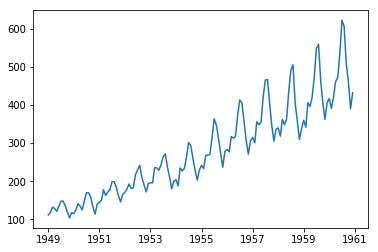

In [4]:
plt.plot(timeseries)

In [30]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    ts_log = np.log(timeseries)
    plt.plot(ts_log)
    #Determing rolling statistics
    moving_avg = ts_log.rolling(12).mean()
    rolstd = ts_log.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


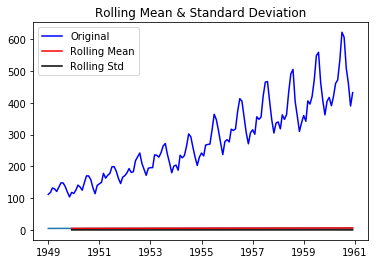

In [31]:
test_stationarity(timeseries)

In [33]:
ts_log = np.log(timeseries)
ts_log.rolling(12).mean()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


ValueError: object too deep for desired array

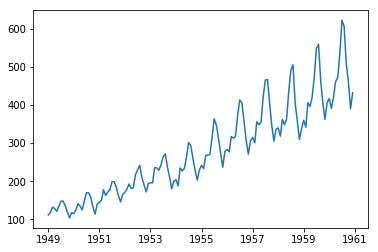

In [29]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


plt.plot(timeseries)
#plt.xlim(0,1000)

x_av = movingaverage(timeseries, 12)
plt.plot(x_av)

xlabel("Time series")
ylabel("Time")
show()

In [34]:
print timeseries

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
1949-06-01          135
1949-07-01          148
1949-08-01          148
1949-09-01          136
1949-10-01          119
1949-11-01          104
1949-12-01          118
1950-01-01          115
1950-02-01          126
1950-03-01          141
1950-04-01          135
1950-05-01          125
1950-06-01          149
1950-07-01          170
1950-08-01          170
1950-09-01          158
1950-10-01          133
1950-11-01          114
1950-12-01          140
1951-01-01          145
1951-02-01          150
1951-03-01          178
1951-04-01          163
1951-05-01          172
1951-06-01          178
...                 ...
1958-07-01          491
1958-08-01          505
1958-09-01          404
1958-10-01          359
1958-11-01          310
1958-12-01          337
1959-01-01          360
1959-02-01          342
1959-03-01      